In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [3]:
# data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python.xlsx')
# data

In [4]:
# data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python_after_humidity_erased.xlsx')
# data

In [53]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python_after_N_changed.xlsx')

In [56]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_revision.xlsx')

In [48]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaem.xlsx')
nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaem_NonIV.xlsx')

In [54]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaout.xlsx')
nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaout_NonIV.xlsx')

In [66]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_rhinitisout.xlsx')
nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_rhinitisout_NonIV.xlsx')

In [11]:
# data['as_error'] = data['as_conf_max'] - data['asthma']
# data['rh_error'] = data['rh_conf_max'] - data['rhinitis']
# data['wh_error'] = data['wh_conf_max'] - data['whole']

In [67]:
data['as_error'] = data['as_conf_max'] - data['asthma']
# data['rh_error'] = data['rh_conf_max'] - data['rhinitis']

In [68]:
data.columns

Index(['lag', 'asthma', 'as_conf_min', 'as_conf_max', 'as_error'], dtype='object')

In [69]:
# 소수점 넷째자리에서 반올림

data = data.round(decimals=3)
data

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,1.078,1.045,1.113,0.034
1,lag1,0.976,0.951,1.002,0.026
2,lag2,0.996,0.969,1.023,0.027
3,lag3,1.038,1.013,1.065,0.026
4,lag4,1.013,0.990,1.036,0.023
5,lag5,1.036,1.013,1.060,0.024
6,lag6,1.043,1.020,1.066,0.023
7,lag7,1.020,0.999,1.042,0.022


In [22]:
# data_pivot = data.pivot(index='disease', columns='lag', values='RR').reset_index()
# # p = data_pivot.index.values
# # data_pivot.reset_index(drop = True, inplace = True)
# # data_pivot.insert(0, column="disease",value = p)
# data_pivot

In [ ]:
# # plot grouped bar chart
# data_pivot.plot(x= 'disease',
#         kind='bar',
#         stacked=False,
#         title='Grouped Bar Graph with dataframe')

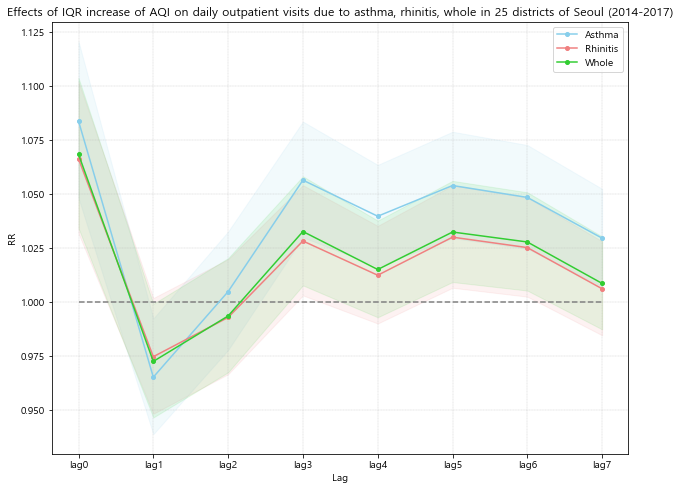

In [110]:
# Create figure and add axes object
fig = plt.figure(figsize=(8, 6)) # figure size
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', markersize = '4')
# plt.errorbar(data['lag'], data['asthma'], yerr = data['as_error'])
ax.plot(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', markersize = '4')
# plt.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'])
ax.plot(data['lag'], data['whole'], color = 'limegreen', marker = 'o', markersize = '4')

plt.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
plt.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
plt.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='limegreen', alpha=0.1)

plt.xlabel('Lag')
plt.ylabel('RR')
plt.title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

# plt.xticks(color='w') # for darkmode 
# plt.yticks(color='w') # for darkmode

# ax.xaxis.label.set_color('w') # for darkmode   
# ax.yaxis.label.set_color('w') # for darkmode 

plt.legend(('Asthma', 'Rhinitis', 'Whole'))
plt.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

plt.grid(linestyle = '--', linewidth = '0.3') # grid

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

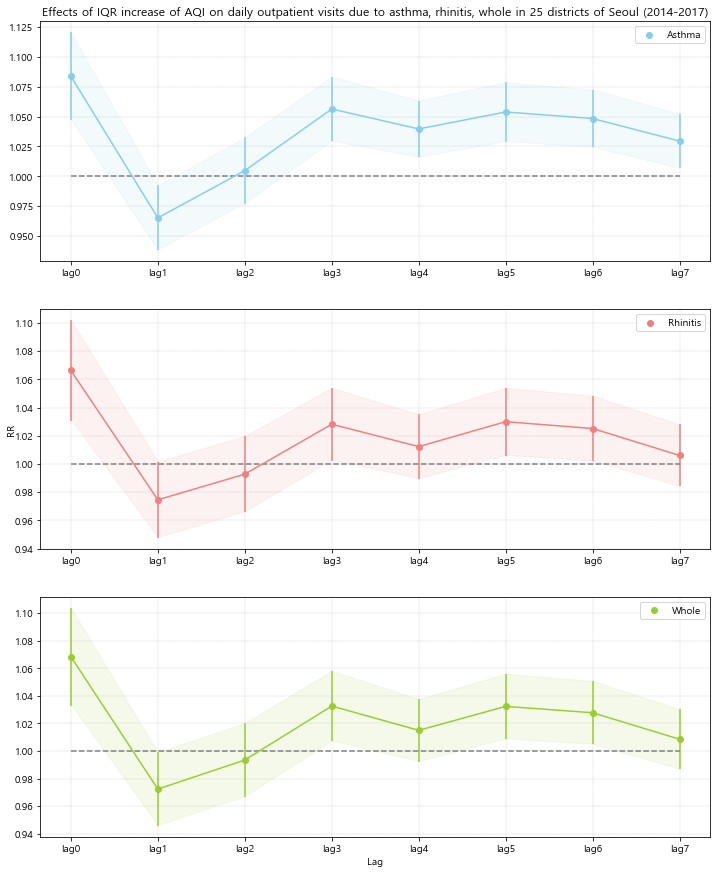

In [159]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 15)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
ax3.grid(linestyle = '--', linewidth = '0.3') # grid

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_2.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

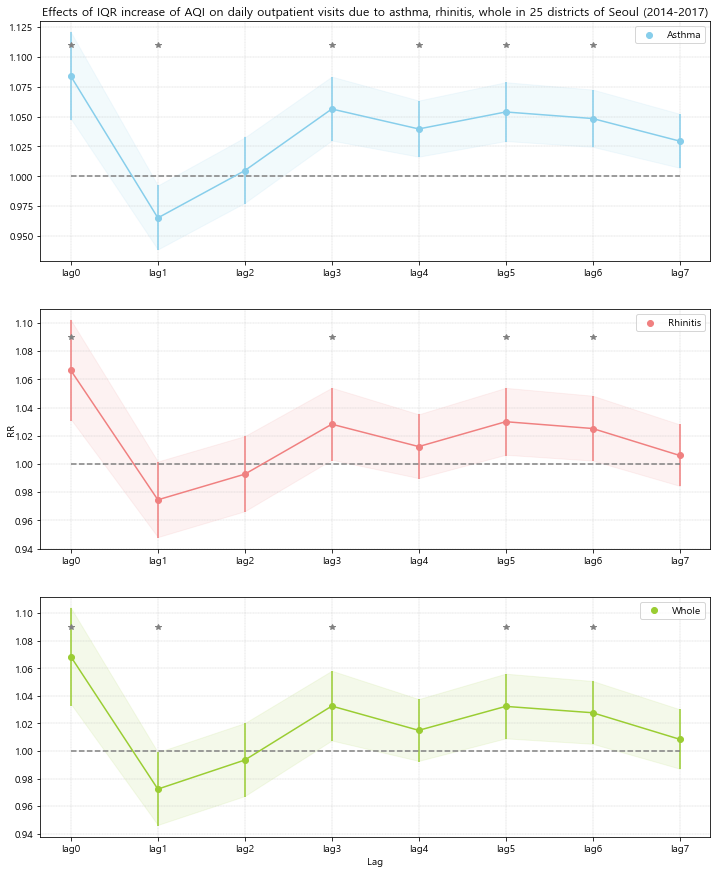

In [158]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 15)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# whole
ax3.plot(0,1.09, '*', color = 'gray')
ax3.plot(1,1.09, '*', color = 'gray')
ax3.plot(3,1.09, '*', color = 'gray')
ax3.plot(5,1.09, '*', color = 'gray')
ax3.plot(6,1.09, '*', color = 'gray')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_3_star.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

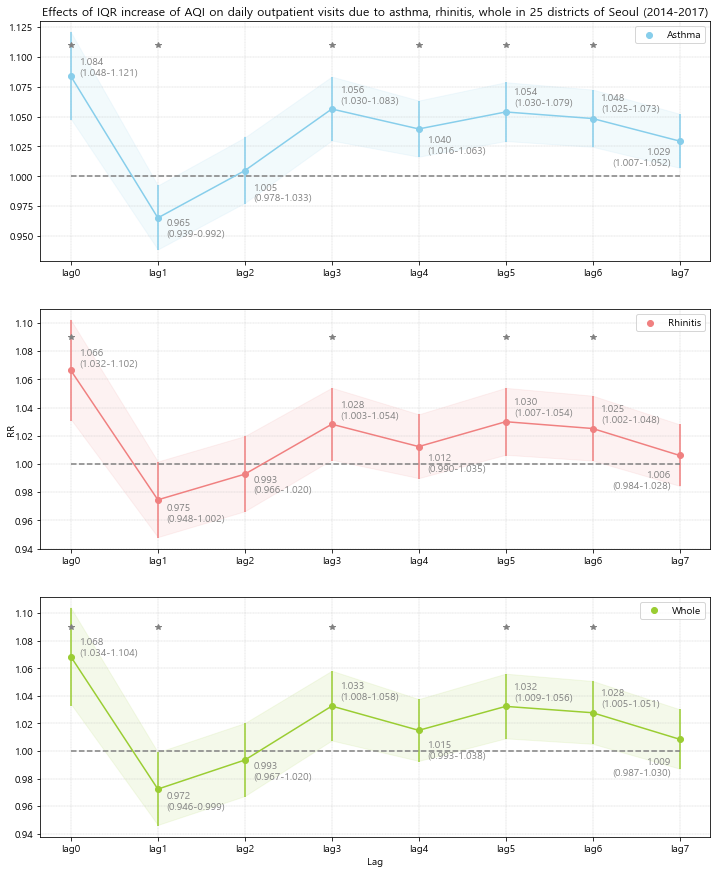

In [10]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 15)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# whole
ax3.plot(0,1.09, '*', color = 'gray')
ax3.plot(1,1.09, '*', color = 'gray')
ax3.plot(3,1.09, '*', color = 'gray')
ax3.plot(5,1.09, '*', color = 'gray')
ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.085, '1.084\n(1.048-1.121)', color = 'gray')
ax1.text(1.1,0.95, '0.965\n(0.939-0.992)', color = 'gray')
ax1.text(2.1,0.98, '1.005\n(0.978-1.033)', color = 'gray')
ax1.text(3.1,1.062, '1.056\n(1.030-1.083)', color = 'gray')
ax1.text(4.1,1.02, '1.040\n(1.016-1.063)', color = 'gray')
ax1.text(5.1,1.06, '1.054\n(1.030-1.079)', color = 'gray')
ax1.text(6.1,1.055, '1.048\n(1.025-1.073)', color = 'gray')
ax1.text(6.9,1.01, '1.029\n(1.007-1.052)', color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '1.066\n(1.032-1.102)', color = 'gray')
ax2.text(1.1,0.96, '0.975\n(0.948-1.002)', color = 'gray')
ax2.text(2.1,0.98, '0.993\n(0.966-1.020)', color = 'gray')
ax2.text(3.1,1.033, '1.028\n(1.003-1.054)', color = 'gray')
ax2.text(4.1,0.995, '1.012\n(0.990-1.035)', color = 'gray')
ax2.text(5.1,1.035, '1.030\n(1.007-1.054)', color = 'gray')
ax2.text(6.1,1.03, '1.025\n(1.002-1.048)', color = 'gray')
ax2.text(6.9,0.983, '1.006\n(0.984-1.028)', color = 'gray', horizontalalignment='right')

# whole
ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_4_value.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

after humidity < 0 erased

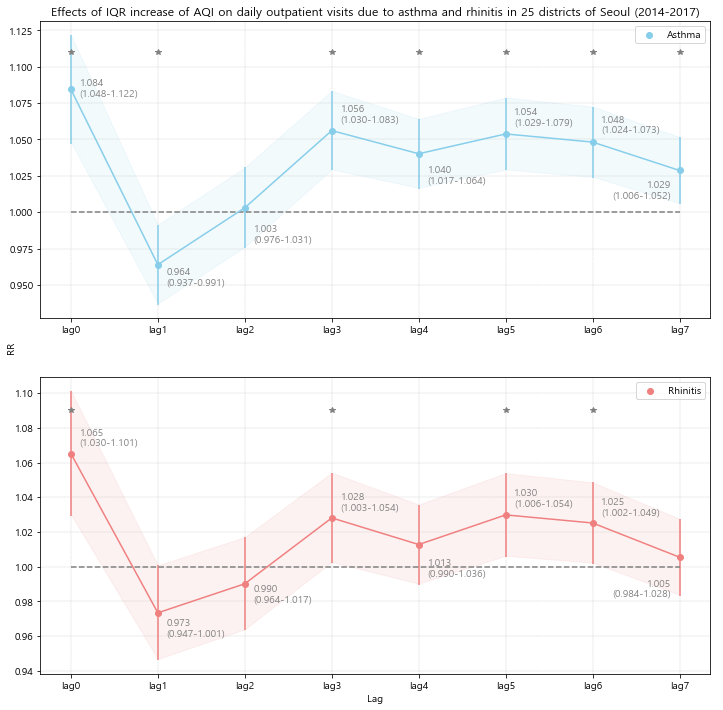

In [14]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma and rhinitis in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')
ax1.plot(7,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '1.084\n(1.048-1.122)', color = 'gray')
ax1.text(1.1,0.95, '0.964\n(0.937-0.991)', color = 'gray')
ax1.text(2.1,0.98, '1.003\n(0.976-1.031)', color = 'gray')
ax1.text(3.1,1.062, '1.056\n(1.030-1.083)', color = 'gray')
ax1.text(4.1,1.02, '1.040\n(1.017-1.064)', color = 'gray')
ax1.text(5.1,1.06, '1.054\n(1.029-1.079)', color = 'gray')
ax1.text(6.1,1.055, '1.048\n(1.024-1.073)', color = 'gray')
ax1.text(6.9,1.01, '1.029\n(1.006-1.052)', color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '1.065\n(1.030-1.101)', color = 'gray')
ax2.text(1.1,0.96, '0.973\n(0.947-1.001)', color = 'gray')
ax2.text(2.1,0.98, '0.990\n(0.964-1.017)', color = 'gray')
ax2.text(3.1,1.033, '1.028\n(1.003-1.054)', color = 'gray')
ax2.text(4.1,0.995, '1.013\n(0.990-1.036)', color = 'gray')
ax2.text(5.1,1.035, '1.030\n(1.006-1.054)', color = 'gray')
ax2.text(6.1,1.03, '1.025\n(1.002-1.049)', color = 'gray')
ax2.text(6.9,0.983, '1.005\n(0.984-1.028)', color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_5_afterhumidity.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

after N changed

In [9]:
data['asthma'][0]

1.018

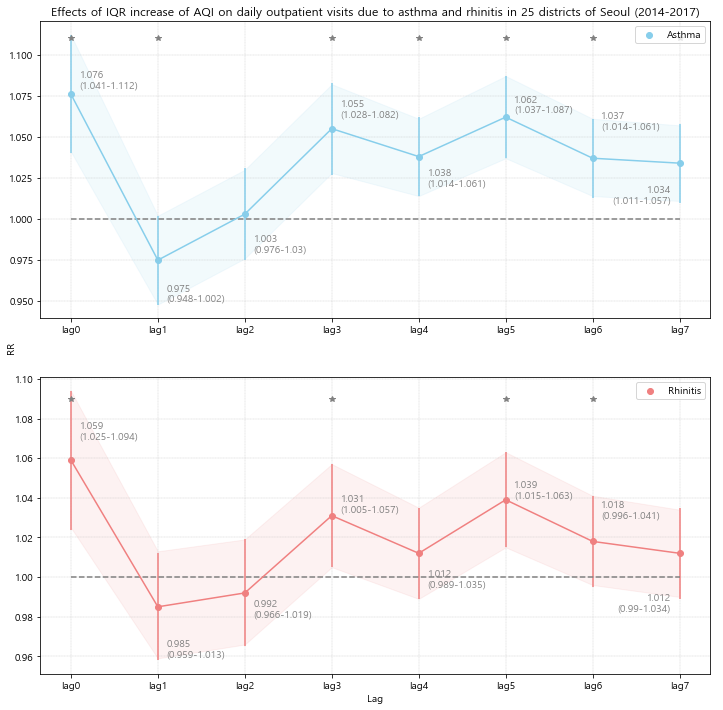

In [71]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma and rhinitis in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')
ax1.plot(7,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.062, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.02, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.065, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.055, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

In [70]:
# nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_NonIV_revision.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
# nonIVdata['rh_error'] = nonIVdata['rh_conf_max'] - nonIVdata['rhinitis']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,1.027,1.019,1.035,0.008
1,lag1,0.990,0.983,0.998,0.008
2,lag2,1.007,1.000,1.015,0.008
3,lag3,1.008,1.001,1.015,0.007
4,lag4,1.013,1.006,1.021,0.007
5,lag5,1.015,1.007,1.022,0.007
6,lag6,1.023,1.016,1.031,0.007
7,lag7,1.008,1.001,1.015,0.007


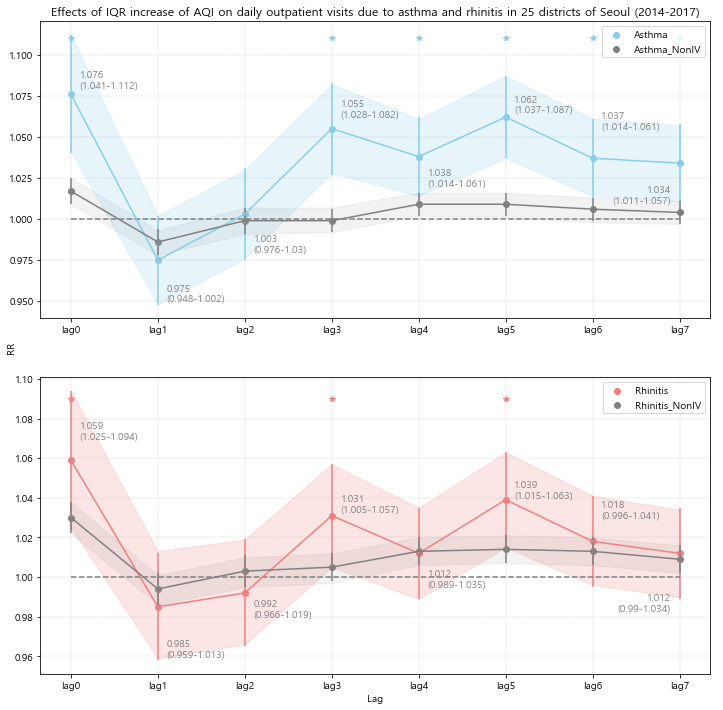

In [84]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma_NonIV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma and rhinitis in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
ax2.plot(0,1.09, '*', color = 'lightcoral')
ax2.plot(3,1.09, '*', color = 'lightcoral')
ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.062, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.02, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.065, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.055, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

asthma만 다시 그리기

In [63]:
# data['asthma'] = data['asthma'].map('{:,.3f}'.format)
# data['as_conf_min'] = data['as_conf_min'].map('{:,.3f}'.format)
# data['as_conf_max'] = data['as_conf_max'].map('{:,.3f}'.format)
# data['as_error'] = data['as_error'].map('{:,.3f}'.format)

In [119]:
data

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,1.078,1.045,1.113,0.034
1,lag1,0.976,0.951,1.002,0.026
2,lag2,0.996,0.969,1.023,0.027
3,lag3,1.038,1.013,1.065,0.026
4,lag4,1.013,0.990,1.036,0.023
5,lag5,1.036,1.013,1.060,0.024
6,lag6,1.043,1.020,1.066,0.023
7,lag7,1.020,0.999,1.042,0.022


In [45]:
# data['asthma'] = data['asthma'].astype(float)
# data['as_conf_min'] = data['as_conf_min'].astype(float)
# data['as_conf_max'] = data['as_conf_max'].astype(float)
# data['as_error'] = data['as_error'].astype(float)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


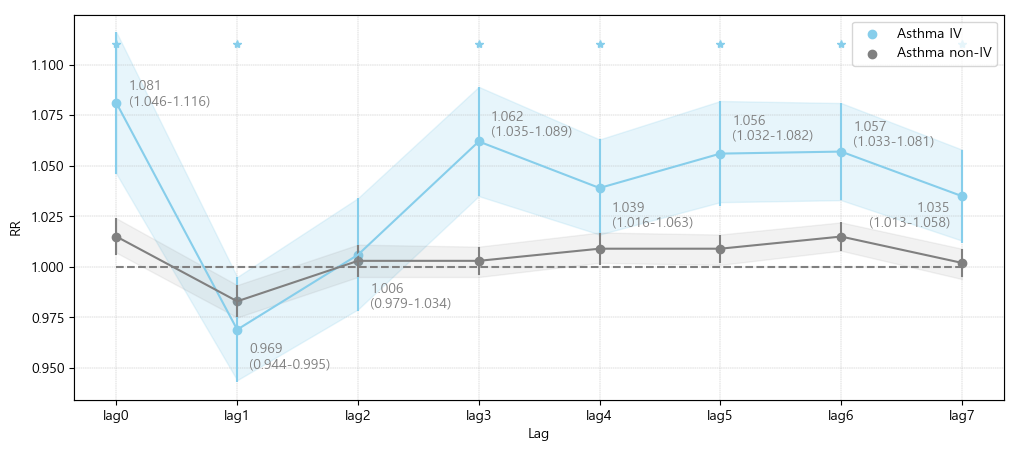

In [67]:
# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
ax1.plot(1,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.065, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.02, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.063, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.06, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma_revision.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma_revision.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma_revision.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

new paper version - one outcome only

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


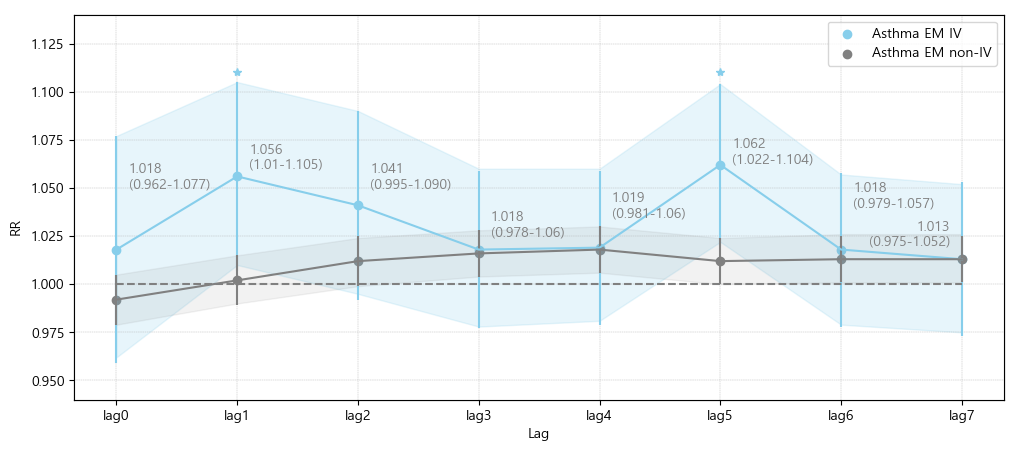

In [53]:
## asthma em with non IV

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma EM IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma EM non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax.set_yticks(np.arange(0.930, 1.130, 0.02))
ax1.set_ylim([0.940, 1.140])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.11, '*', color = 'skyblue')
ax1.plot(1,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
# ax1.plot(3,1.11, '*', color = 'skyblue')
# ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
# ax1.plot(6,1.11, '*', color = 'skyblue')
# ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.05, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.06, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.05, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.025, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.035, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.063, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.04, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaem_withNonIVs.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaem_withNonIVs.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaem_withNonIVs.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


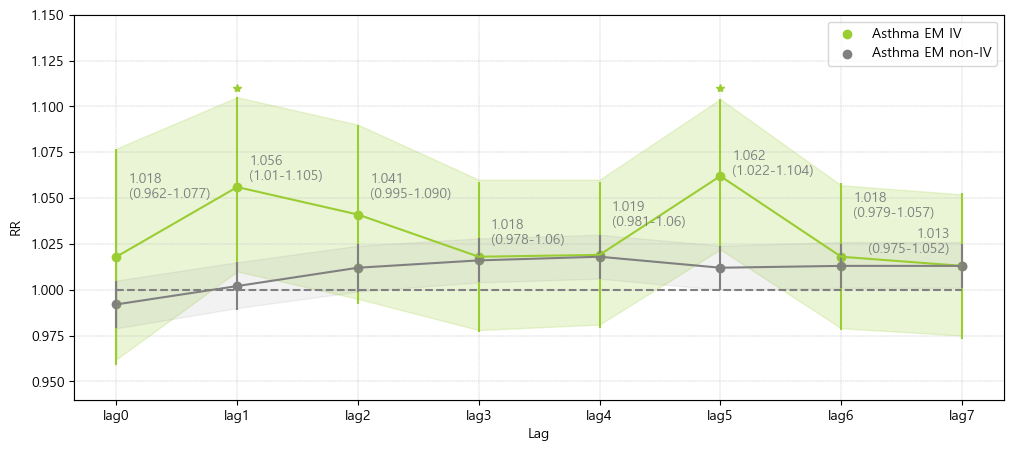

In [53]:
## asthma em with non IV - colorchanged version (yellowgreen)

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'yellowgreen', marker = 'o', label = 'Asthma EM IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'yellowgreen')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma EM non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax.set_yticks(np.arange(0.930, 1.130, 0.02))
ax1.set_ylim([0.940, 1.150])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='yellowgreen', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.11, '*', color = 'skyblue')
ax1.plot(1,1.11, '*', color = 'yellowgreen')
# ax1.plot(1,1.11, '*', color = 'gray')
# ax1.plot(3,1.11, '*', color = 'skyblue')
# ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'yellowgreen')
# ax1.plot(6,1.11, '*', color = 'skyblue')
# ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.05, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.06, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.05, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.025, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.035, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.063, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.04, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaem_withNonIVs_yellowgreen.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaem_withNonIVs_yellowgreen.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaem_withNonIVs_yellowgreen.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


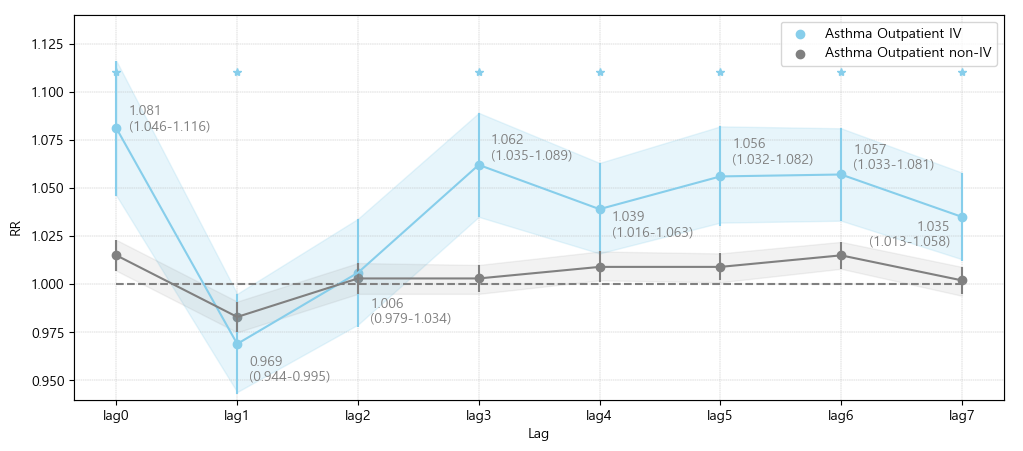

In [60]:
## asthma out with non IV

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

ax1.set_ylim([0.940, 1.140])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
ax1.plot(1,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.065, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.025, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.063, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.06, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaout_withNonIVs.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaout_withNonIVs.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaout_withNonIVs.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


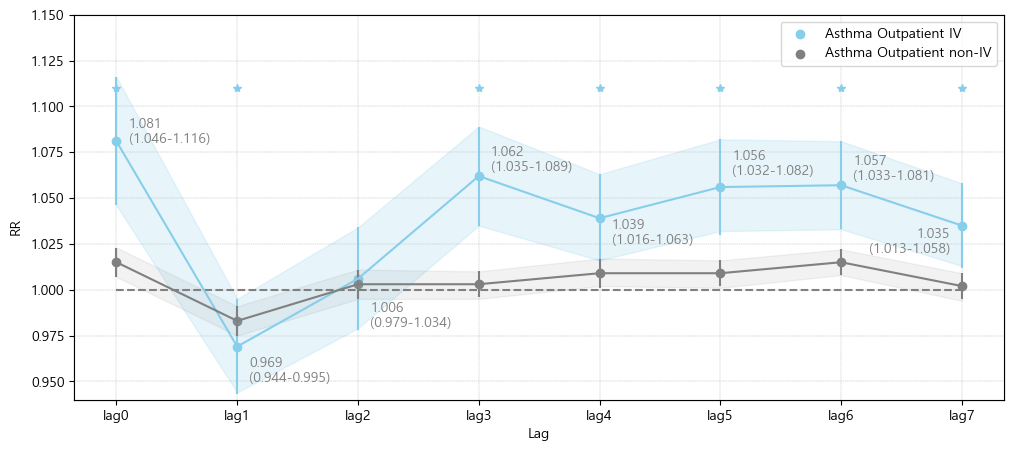

In [59]:
## asthma out with non IV - colorchanged version (skyblue)

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

ax1.set_ylim([0.940, 1.150])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
ax1.plot(1,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.065, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.025, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.063, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.06, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaout_withNonIVs_skyblue.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaout_withNonIVs_skyblue.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaout_withNonIVs_skyblue.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


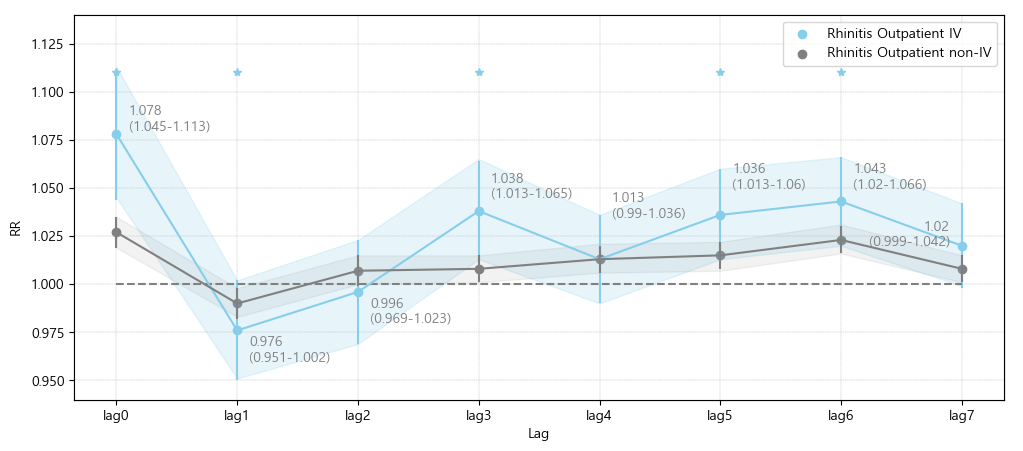

In [67]:
## rhinitis out with non IV

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Rhinitis Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Rhinitis Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

ax1.set_ylim([0.940, 1.140])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
ax1.plot(1,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
# ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
# ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.96, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.045, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.035, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.05, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.05, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\rhinitisout_withNonIVs.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\rhinitisout_withNonIVs.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\rhinitisout_withNonIVs.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


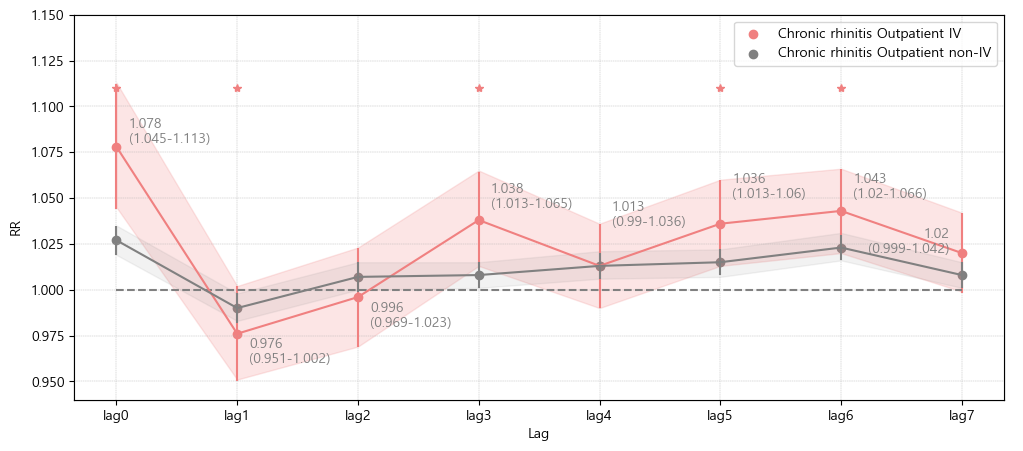

In [71]:
## rhinitis out with non IV - colorchanged version (lightcoral)

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Chronic rhinitis Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Chronic rhinitis Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

ax1.set_ylim([0.940, 1.150])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'lightcoral')
ax1.plot(1,1.11, '*', color = 'lightcoral')
# ax1.plot(1,1.11, '*', color = 'lightcoral')
ax1.plot(3,1.11, '*', color = 'lightcoral')
# ax1.plot(4,1.11, '*', color = 'lightcoral')
ax1.plot(5,1.11, '*', color = 'lightcoral')
ax1.plot(6,1.11, '*', color = 'lightcoral')
# ax1.plot(7,1.11, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.96, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.045, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.035, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.05, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.05, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.02, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\rhinitisout_withNonIVs_lightcoral.png', facecolor = 'w', bbox_inches = "tight") # save 
# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\rhinitisout_withNonIVs_lightcoral.pdf', transparent = True, facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\rhinitisout_withNonIVs_lightcoral.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, pdf transparent True

plt.show()

In [17]:
data['asthma'][0]

1.018

### 0908 moving average 추가

In [23]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_revision.xlsx')
data['as_error'] = data['as_conf_max'] - data['asthma']
data = data.round(decimals=3)
data

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,NaN,NaN,NaN,NaN
1,lag0 - lag1,1.029,1.000,1.058,0.029
2,lag0 - lag2,1.025,0.997,1.053,0.028
3,lag0 - lag3,1.050,1.022,1.079,0.029
4,lag0 - lag4,1.064,1.034,1.094,0.030
5,lag0 - lag5,1.081,1.051,1.112,0.031
6,lag0 - lag6,1.102,1.070,1.136,0.034
7,lag0 - lag7,1.111,1.078,1.145,0.034


In [24]:
nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_NonIV_revision.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,NaN,NaN,NaN,NaN
1,lag0 - lag1,0.998,0.990,1.006,0.008
2,lag0 - lag2,1.000,0.991,1.008,0.008
3,lag0 - lag3,1.001,0.992,1.010,0.009
4,lag0 - lag4,1.005,0.995,1.014,0.009
5,lag0 - lag5,1.008,0.998,1.018,0.010
6,lag0 - lag6,1.013,1.002,1.023,0.010
7,lag0 - lag7,1.013,1.002,1.024,0.011


In [28]:
# new paper - asthma em
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaemMA.xlsx')
data['as_error'] = data['as_conf_max'] - data['asthma']
data = data.round(decimals=3)

nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaemMA_NonIV.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,MA,asthma,as_conf_min,as_conf_max,as_error
0,MA0-1,0.996,0.982,1.012,0.015
1,MA0-2,1.004,0.988,1.021,0.017
2,MA0-3,1.012,0.994,1.030,0.018
3,MA0-4,1.021,1.001,1.040,0.020
4,MA0-5,1.025,1.005,1.046,0.021
5,MA0-6,1.030,1.009,1.052,0.022
6,MA0-7,1.035,1.012,1.058,0.023


In [36]:
# new paper - asthma out
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaoutMA.xlsx')
data['as_error'] = data['as_conf_max'] - data['asthma']
data = data.round(decimals=3)

nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_asthmaoutMA_NonIV.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,MA,asthma,as_conf_min,as_conf_max,as_error
0,MA0-1,0.998,0.988,1.007,0.009
1,MA0-2,1.000,0.990,1.010,0.010
2,MA0-3,1.001,0.990,1.012,0.011
3,MA0-4,1.006,0.994,1.018,0.012
4,MA0-5,1.010,0.997,1.022,0.013
5,MA0-6,1.016,1.003,1.030,0.013
6,MA0-7,1.016,1.002,1.030,0.014


In [72]:
# new paper - rhinitis out
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_rhinitisoutMA.xlsx')
data['as_error'] = data['as_conf_max'] - data['asthma']
data = data.round(decimals=3)

nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\new_paper_main_figures_230927_rhinitisoutMA_NonIV.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,MA,asthma,as_conf_min,as_conf_max,as_error
0,MA0-1,1.010,1.001,1.019,0.009
1,MA0-2,1.013,1.003,1.023,0.010
2,MA0-3,1.016,1.005,1.027,0.011
3,MA0-4,1.021,1.010,1.033,0.012
4,MA0-5,1.027,1.015,1.040,0.013
5,MA0-6,1.037,1.024,1.050,0.013
6,MA0-7,1.039,1.025,1.053,0.014


In [73]:
# new paper - column, row names modify

data.rename(columns = {'MA' : 'lag'}, inplace = True)
data['lag'][0] = 'lag0 - lag1'
data['lag'][1] = 'lag0 - lag2'
data['lag'][2] = 'lag0 - lag3'
data['lag'][3] = 'lag0 - lag4'
data['lag'][4] = 'lag0 - lag5'
data['lag'][5] = 'lag0 - lag6'
data['lag'][6] = 'lag0 - lag7'

nonIVdata.rename(columns = {'MA' : 'lag'}, inplace = True)
nonIVdata['lag'][0] = 'lag0 - lag1'
nonIVdata['lag'][1] = 'lag0 - lag2'
nonIVdata['lag'][2] = 'lag0 - lag3'
nonIVdata['lag'][3] = 'lag0 - lag4'
nonIVdata['lag'][4] = 'lag0 - lag5'
nonIVdata['lag'][5] = 'lag0 - lag6'
nonIVdata['lag'][6] = 'lag0 - lag7'

C:\Users\admin\AppData\Local\Temp\ipykernel_14168\1424428677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lag'][0] = 'lag0 - lag1'
C:\Users\admin\AppData\Local\Temp\ipykernel_14168\1424428677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lag'][1] = 'lag0 - lag2'
C:\Users\admin\AppData\Local\Temp\ipykernel_14168\1424428677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lag'][2] = 'lag0 - lag3'
C:\User

<ipython-input-50-d1dd712153ae>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(1, 1, 1)


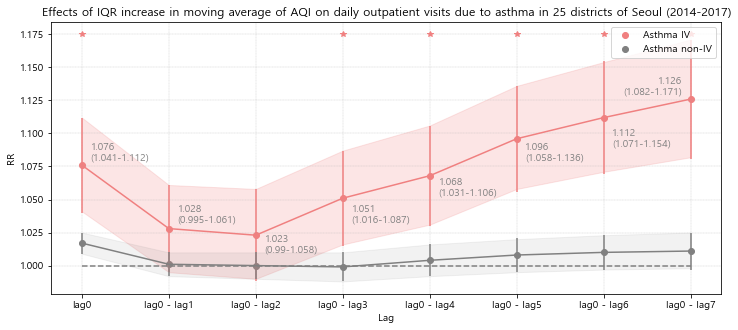

In [50]:
# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Asthma IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(2,1.175, '*', color = 'lightcoral')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.033, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.01, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.033, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.053, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.08, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.09, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.13, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

#### lag0 없는 버전

In [27]:
data.drop(0, axis = 0, inplace = True)
data.reset_index(drop = True, inplace = True)
data

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0 - lag2,1.071,1.015,1.130,0.059
1,lag0 - lag3,1.072,1.015,1.133,0.061
2,lag0 - lag4,1.078,1.017,1.142,0.064
3,lag0 - lag5,1.108,1.044,1.177,0.068
4,lag0 - lag6,1.112,1.044,1.184,0.072
5,lag0 - lag7,1.114,1.043,1.189,0.075


In [21]:
nonIVdata.drop(0, axis = 0, inplace = True)
nonIVdata.reset_index(drop = True, inplace = True)
nonIVdata

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0 - lag2,1.004,0.988,1.021,0.017
1,lag0 - lag3,1.012,0.994,1.030,0.018
2,lag0 - lag4,1.021,1.001,1.040,0.020
3,lag0 - lag5,1.025,1.005,1.046,0.021
4,lag0 - lag6,1.030,1.009,1.052,0.022
5,lag0 - lag7,1.035,1.012,1.058,0.023


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


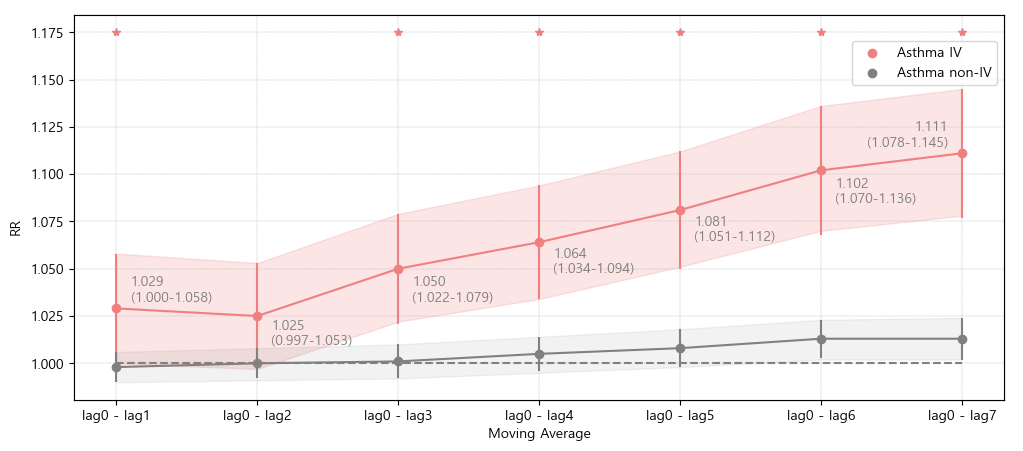

In [49]:
# pdf로 뽑기

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Asthma IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
# ax1.legend(loc="upper left")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
# ax1.legend(loc="upper left")

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
# ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.033, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.01, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.033, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.048, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.065, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.085, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.115, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV_withoutlag0_revision.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV_withoutlag0_revision.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV_withoutlag0_revision.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


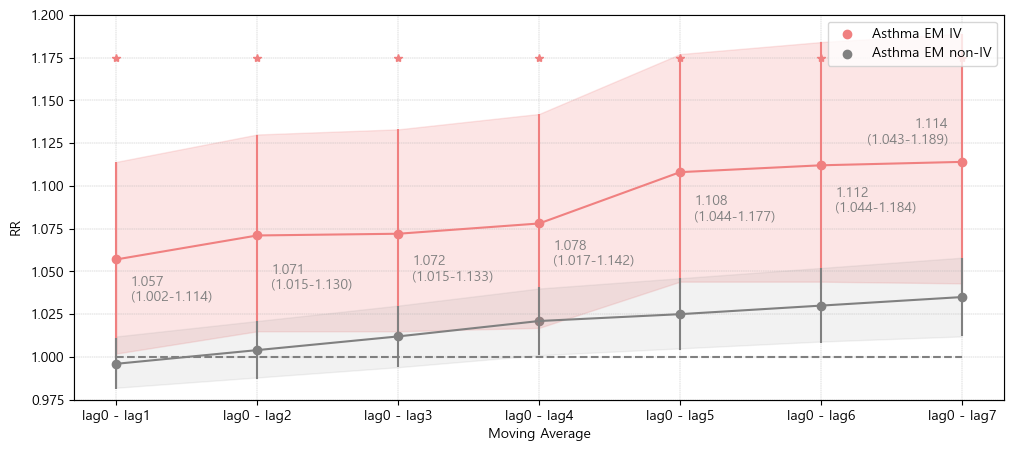

In [91]:
# new paper - asthma em

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Asthma EM IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma EM non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.set_ylim([0.975, 1.200])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.175, '*', color = 'lightcoral')
ax1.plot(1,1.175, '*', color = 'lightcoral')
ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
# ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.033, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.045, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.054, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.08, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.085, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.125, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaEM_moving_average_withNonIV.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaEM_moving_average_withNonIV.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaEM_moving_average_withNonIV.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


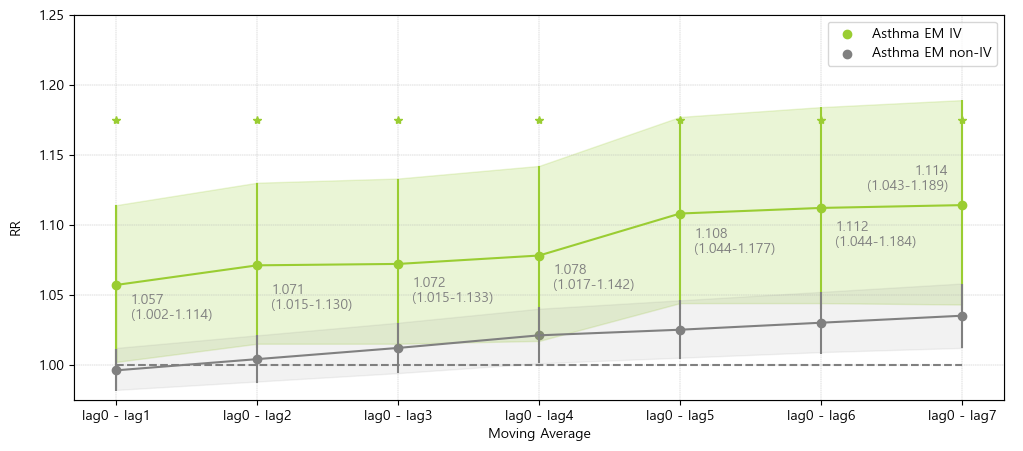

In [34]:
# new paper - asthma em - colorchanged version (yellowgreen)

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'yellowgreen', marker = 'o', label = 'Asthma EM IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'yellowgreen')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma EM non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.set_ylim([0.975, 1.250]) #240823 expand ylim

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='yellowgreen', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='yellowgreen', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.175, '*', color = 'yellowgreen')
ax1.plot(1,1.175, '*', color = 'yellowgreen')
ax1.plot(2,1.175, '*', color = 'yellowgreen')
ax1.plot(3,1.175, '*', color = 'yellowgreen')
ax1.plot(4,1.175, '*', color = 'yellowgreen')
ax1.plot(5,1.175, '*', color = 'yellowgreen')
ax1.plot(6,1.175, '*', color = 'yellowgreen')
# ax1.plot(7,1.175, '*', color = 'yellowgreen')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.033, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.045, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.054, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.08, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.085, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.125, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaEM_moving_average_withNonIV_yellowgreen.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaEM_moving_average_withNonIV_yellowgreen.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaEM_moving_average_withNonIV_yellowgreen.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


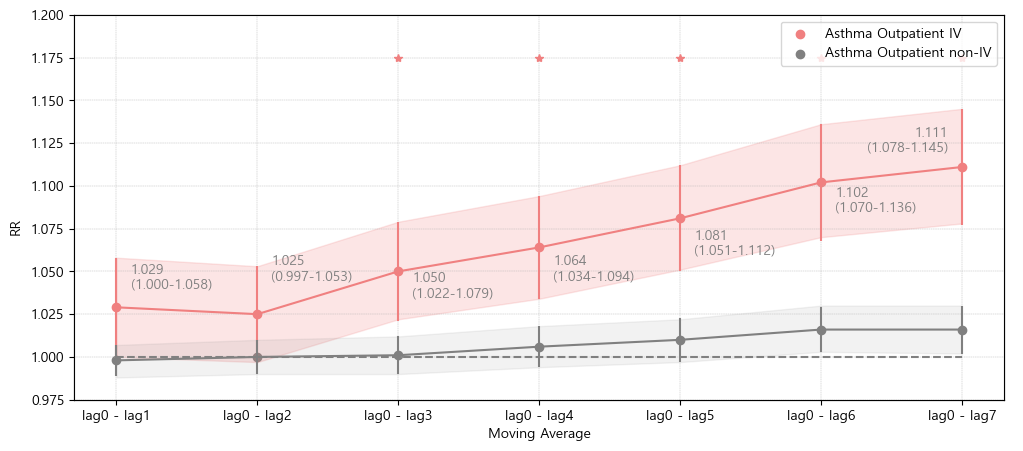

In [94]:
# new paper - asthma out

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Asthma Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.set_ylim([0.975, 1.200])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(1,1.175, '*', color = 'lightcoral')
ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
# ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.045, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.035, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.045, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.06, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.085, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.12, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaOUT_moving_average_withNonIV.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaOUT_moving_average_withNonIV.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\asthmaOUT_moving_average_withNonIV.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


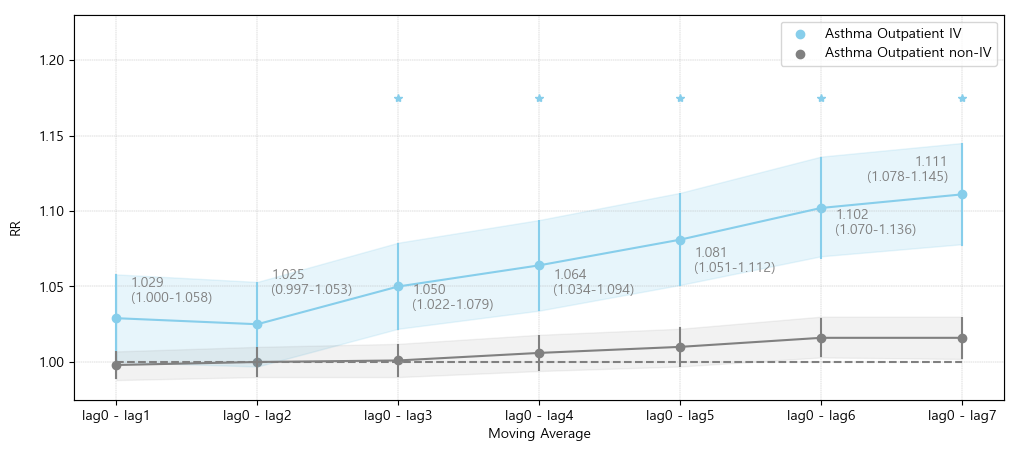

In [39]:
# new paper - asthma out - colorchanged version (skyblue)

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.set_ylim([0.975, 1.230])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.175, '*', color = 'skyblue')
# ax1.plot(1,1.175, '*', color = 'skyblue')
ax1.plot(2,1.175, '*', color = 'skyblue')
ax1.plot(3,1.175, '*', color = 'skyblue')
ax1.plot(4,1.175, '*', color = 'skyblue')
ax1.plot(5,1.175, '*', color = 'skyblue')
ax1.plot(6,1.175, '*', color = 'skyblue')
# ax1.plot(7,1.175, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.045, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.035, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.045, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.06, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.085, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.12, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaOUT_moving_average_withNonIV_skyblue.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaOUT_moving_average_withNonIV_skyblue.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\asthmaOUT_moving_average_withNonIV_skyblue.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


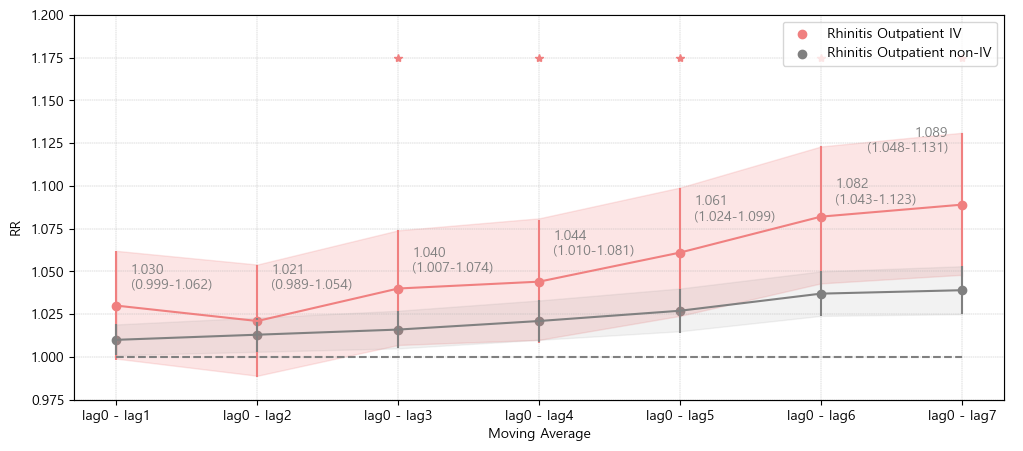

In [88]:
# new paper - rhinitis out

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Rhinitis Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Rhinitis Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.set_ylim([0.975, 1.200])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(1,1.175, '*', color = 'lightcoral')
ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
# ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.05, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.06, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.08, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.09, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.12, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\rhinitisOUT_moving_average_withNonIV.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\rhinitisOUT_moving_average_withNonIV.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\rhinitisOUT_moving_average_withNonIV.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


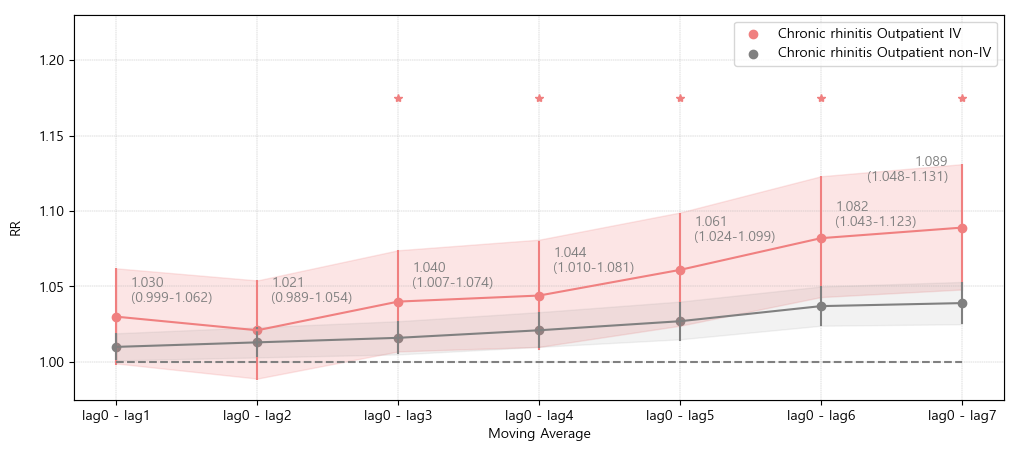

In [74]:
# new paper - rhinitis out - colorchanged version (lightcoral)

# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Chronic rhinitis Outpatient IV')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Chronic rhinitis Outpatient non-IV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
# ax1.legend(loc=1, bbox_to_anchor=(1.0, 0.95))
ax1.legend(loc="upper right")

ax1.set_ylim([0.975, 1.230])

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Moving Average')
ax.set_ylabel('RR')
ax.yaxis.set_label_coords(-.055,.45)
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(1,1.175, '*', color = 'lightcoral')
ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
# ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.04, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.05, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.06, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.08, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.09, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.12, '{:.3f}\n({:.3f}-{:.3f})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\rhinitisOUT_moving_average_withNonIV_lightcoral.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\rhinitisOUT_moving_average_withNonIV_lightcoral.pdf', facecolor = 'w', bbox_inches = "tight") # save, pdf
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\new paper\\colorchanged_240823\\rhinitisOUT_moving_average_withNonIV_lightcoral.eps', format = 'eps', facecolor = 'w', bbox_inches = "tight") # save, eps

plt.show()
